# Visualizing the results

This notebook has one single purpose:

1. To plot the results from the simulation

![samples](imgs/samples.png)

*Due to limited computational resources, only a limited number of `rounds` can be done in single simulation, so to overcome the issue, instead of one simulation with a sufficient number of rounds, many simulations with only modest number of rounds were computed and their results were processed in order to deliver one single final visualization.*

## Method

1. The outcomes from each simulation is read as 2d-ndarray and stacked along a third axis
2. The `aggregate_results` function computes *mean* and *standard deviation* for each cell along the stacking axis
3. Extreme values for each cell in the 2d matrix are removed and a new definitive *mean* for each cells is computed
4. The function `heatmap` plot each cell (representing a pair $(N, \ sigma)$) as a pixel according to a colormap.

In [1]:
from resources.plot import heatmap
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
def aggregate_results(imgs):
    """this function removes extreme values (greater than 1.5*std + mean)"""
    imgs = np.array(imgs, dtype=np.float64)
    mean = imgs.mean(axis=0)
    std = imgs.std(axis=0)
    mask = imgs >= mean + 1.5 * std
    imgs[mask] = np.nan
    return np.nanmean(imgs, axis=0)

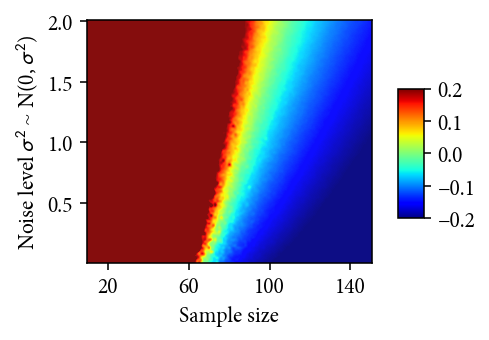

In [3]:
# processing and saving the data
path = 'outputs/'
suffix = 'x3000_overfit_data-qf20u-g2g10_n250_120x150.pickle'
files =  map(lambda i: path + f'sim{i}' + suffix, range(25,37))
imgs = list(map(lambda s: pickle.load(open(s,'rb')), files))
res = aggregate_results(imgs)
np.save('results', res)

# plotting the processed data
params = {'x_params':(10, 151), 'y_params':(120,2)}
fig = heatmap(res, params=params, c_range=(-.2, .2), bar=True)
fig.savefig('imgs/experiment.png')